In [53]:
from castle.algorithms import PC
from castle.common import GraphDAG
import networkx as nx
import matplotlib.pyplot as plt
from causalbench.data.simulated_feedback.simulated_feedback_loader import load_feedback

In [263]:
dataset_group_name = 'Network1_amp'
dataset1 = load_feedback(dataset_group_name, 1)
dataset2 = load_feedback(dataset_group_name, 2)
dataset3 = load_feedback(dataset_group_name, 3)
dataset4 = load_feedback(dataset_group_name, 4)

In [264]:
true_causal_matrix, X_1 = dataset1['true_matrix'], dataset1['X']
X_2 = dataset2['X']
X_3 = dataset3['X']
X_4 = dataset4['X']

In [265]:
def gen_var_name_by_index(index:int):
    return 'X'+str(index+1)

In [266]:
def add_nodes_to_graph(adj_matrix, graph):
    for i in range(len(adj_matrix[0])):
        graph.add_node(gen_var_name_by_index(i))
    return graph    
        
    

In [267]:
def add_edges_to_graph(adj_matrix, graph):
    for i in range(len(adj_matrix[0])):
        for j in range(len(adj_matrix[0])):
            if adj_matrix[i][j] == 1:
                graph.add_edge(gen_var_name_by_index(i), gen_var_name_by_index(j))
    return graph            

In [268]:
def generate_dag_based_on_adj_matrix(adj_matrix):
    g = nx.DiGraph()
    add_nodes_to_graph(adj_matrix, g)
    add_edges_to_graph(adj_matrix, g)
    return g

In [330]:
def show_graph(graph, pos):
    nx.draw_networkx_nodes(graph, pos, node_size = 1000)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows = True, arrowsize=30)
    plt.show()

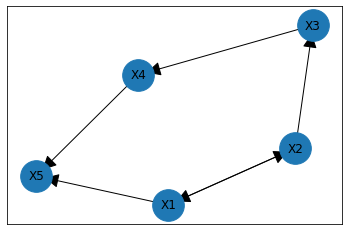

In [332]:
g_true = generate_dag_based_on_adj_matrix(true_causal_matrix)
pos = nx.spring_layout(g_true, scale=5)
show_graph(g_true, pos)

In [333]:
def gen_est_matrix_by_pc(dataset):
    pc = PC()
    pc.learn(dataset)
    return pc.causal_matrix

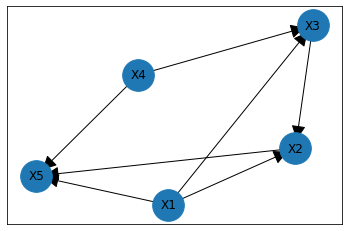

In [334]:
est_1 = gen_est_matrix_by_pc(X_1)
g_1 = generate_dag_based_on_adj_matrix(est_1)
show_graph(g_1, pos)

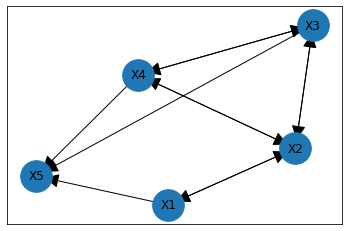

In [335]:
est_2 = gen_est_matrix_by_pc(X_2)
g_2 = generate_dag_based_on_adj_matrix(est_2)
show_graph(g_2, pos)

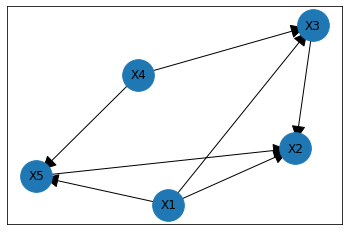

In [336]:
est_3 = gen_est_matrix_by_pc(X_3)
g_3 = generate_dag_based_on_adj_matrix(est_3)
show_graph(g_3, pos)

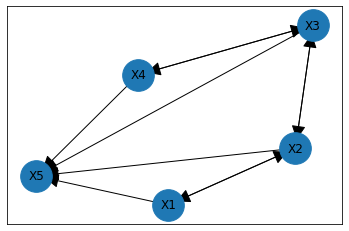

In [337]:
est_4 = gen_est_matrix_by_pc(X_4)
g_4 = generate_dag_based_on_adj_matrix(est_4)
show_graph(g_4, pos)